<a href="https://colab.research.google.com/github/TimotheeeNiven/IntroML_TNiven/blob/main/Homework5_TNiven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [101]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
t_u1 = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_u = torch.tensor(t_u1)

In [103]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [104]:
def training_loop(nepochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, nepochs + 1):
        # Forward pass
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            for param in params:
                param -= learning_rate * param.grad
        for param in params:
            param.grad.zero_()

        # Print loss every 500 epochs
        if epoch % 500 == 0:
            print('Epoch {}: Loss {:.4f}'.format(epoch, loss.item()))

    return params, loss.item()


In [105]:
#This is the parameter section
t_u_normalized = F.normalize(t_u.view(-1, 1).float(), dim=0).view(-1)
w2 = torch.nn.Parameter(torch.ones(()), requires_grad=True)
w1 = torch.nn.Parameter(torch.ones(()), requires_grad=True)
b = torch.nn.Parameter(torch.zeros(()), requires_grad=True)
params = [w2, w1, b]

t_c = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])


In [106]:
# Problem 1 B
nepochs = 5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_loss = float('inf')
best_params = None

for lr in learning_rates:
    print('\nTraining with learning rate: {}'.format(lr))
    trained_params, current_loss = training_loop(nepochs, lr, params, t_u_normalized, t_c)

    # Update the model if the loss just ran is lower
    if current_loss < best_loss:
        best_loss = current_loss
        best_params = trained_params



Training with learning rate: 0.1
Epoch 500: Loss 30.5898
Epoch 1000: Loss 4.8828
Epoch 1500: Loss 1.1923
Epoch 2000: Loss 0.6562
Epoch 2500: Loss 0.5722
Epoch 3000: Loss 0.5530
Epoch 3500: Loss 0.5432
Epoch 4000: Loss 0.5349
Epoch 4500: Loss 0.5269
Epoch 5000: Loss 0.5191

Training with learning rate: 0.01
Epoch 500: Loss 0.5183
Epoch 1000: Loss 0.5176
Epoch 1500: Loss 0.5168
Epoch 2000: Loss 0.5160
Epoch 2500: Loss 0.5153
Epoch 3000: Loss 0.5145
Epoch 3500: Loss 0.5137
Epoch 4000: Loss 0.5130
Epoch 4500: Loss 0.5122
Epoch 5000: Loss 0.5114

Training with learning rate: 0.001
Epoch 500: Loss 0.5114
Epoch 1000: Loss 0.5113
Epoch 1500: Loss 0.5113
Epoch 2000: Loss 0.5113
Epoch 2500: Loss 0.5112
Epoch 3000: Loss 0.5112
Epoch 3500: Loss 0.5111
Epoch 4000: Loss 0.5111
Epoch 4500: Loss 0.5111
Epoch 5000: Loss 0.5110

Training with learning rate: 0.0001
Epoch 500: Loss 0.5110
Epoch 1000: Loss 0.5110
Epoch 1500: Loss 0.5110
Epoch 2000: Loss 0.5110
Epoch 2500: Loss 0.5110
Epoch 3000: Loss 0.51


Training the linear model for comparison
Epoch 500: Loss 174.3617
Epoch 1000: Loss 143.7020
Epoch 1500: Loss 118.4520
Epoch 2000: Loss 97.6571
Epoch 2500: Loss 80.5314
Epoch 3000: Loss 66.4274
Epoch 3500: Loss 54.8120
Epoch 4000: Loss 45.2459
Epoch 4500: Loss 37.3677
Epoch 5000: Loss 30.8793


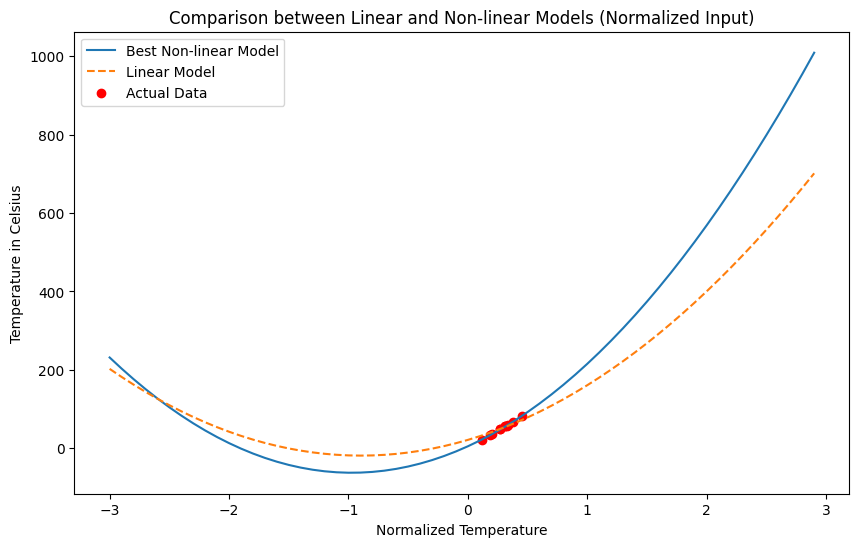


Final Loss (Best Non-linear Model): 0.5110
Final Loss (Linear Model): 30.8793


In [107]:
# Problem 1C
# Train the linear side of the model
linear_params = [torch.nn.Parameter(torch.ones(()), requires_grad=True),
                 torch.nn.Parameter(torch.zeros(()), requires_grad=True),
                 torch.nn.Parameter(torch.zeros(()), requires_grad=True)]

print('\nTraining the linear model for comparison')
_, linear_loss = training_loop(nepochs, 0.01, linear_params, t_u_normalized, t_c)

# Below is all of the plotting features to see our final graph
t_range_normalized = torch.arange(-3., 3., 0.1)
plt.figure(figsize=(10, 6))

# Non-linear model
plt.plot(t_range_normalized, model(t_range_normalized, *best_params).detach().numpy(), label='Best Non-linear Model')

# Linear model
plt.plot(t_range_normalized, model(t_range_normalized, *linear_params).detach().numpy(), label='Linear Model', linestyle='--')

# Original data
plt.scatter(t_u_normalized, t_c, label='Actual Data', color='red')
plt.legend()
plt.xlabel('Normalized Temperature')
plt.ylabel('Temperature in Celsius')
plt.title('Comparison between Linear and Non-linear Models (Normalized Input)')
plt.show()

# Final Plot Area
print('\nFinal Loss (Best Non-linear Model): {:.4f}'.format(best_loss))
print('Final Loss (Linear Model): {:.4f}'.format(linear_loss))

In [108]:
#Problem 2
urlhousing = '/content/drive/MyDrive/IntroML/CSVFiles/Housing.csv'

df = pd.read_csv(urlhousing)

# Display the first 5 rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [109]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0, 'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
# Defining the map function for furnishing status

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [110]:
from sklearn.preprocessing import StandardScaler
import statistics
# Calculate the standard deviation
columns = ['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

scaler = StandardScaler()

# Fit and transform the scaler into the forementioned calculation
df[columns] = scaler.fit_transform(df[columns])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286


In [111]:
#Data set locations
X = df.iloc[:, [1,2,3,4,10]].values
Y = df.iloc[:, 0].values
# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=0)

In [113]:
# Define the Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


In [114]:
#Problem 2B
def train_model(X_train, Y_train, X_val, Y_val, learning_rate, num_epochs=5000):
    input_size = X_train.shape[1]
    model = LinearRegressionModel(input_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Loss value declarations
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss every 500 epochs
        if (epoch + 1) % 500 == 0:
            train_losses.append(loss.item())
            with torch.no_grad():
                model.eval()
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, Y_val)
                val_losses.append(val_loss.item())

                print('Epoch [{}/{}], Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item(), val_loss.item()))

            model.train()

    return model, train_losses, val_losses

In [115]:
# The code below is similar to the previous problem in a sense that it will be used to find the bestmodel
learning_rates = [0.1, 0.01, 0.001, 0.0001]

best_model = None
best_val_loss = float('inf')
best_lr = None

all_train_losses = []
all_val_losses = []

for lr in learning_rates:
    print('\Llearning rate: {}'.format(lr))
    model, train_losses, val_losses = train_model(X_train, Y_train, X_val, Y_val, lr)

    # Pick the best model based on validation loss
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model = model
        best_lr = lr

    # Append the loss lists
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

\Llearning rate: 0.1
Epoch [500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [1000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [1500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [3000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [3500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [4000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [4500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [5000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
\Llearning rate: 0.01
Epoch [500/5000], Training Loss: 0.4656, Validation Loss: 0.3362
Epoch [1000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [1500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2500/5000], Training Loss: 0

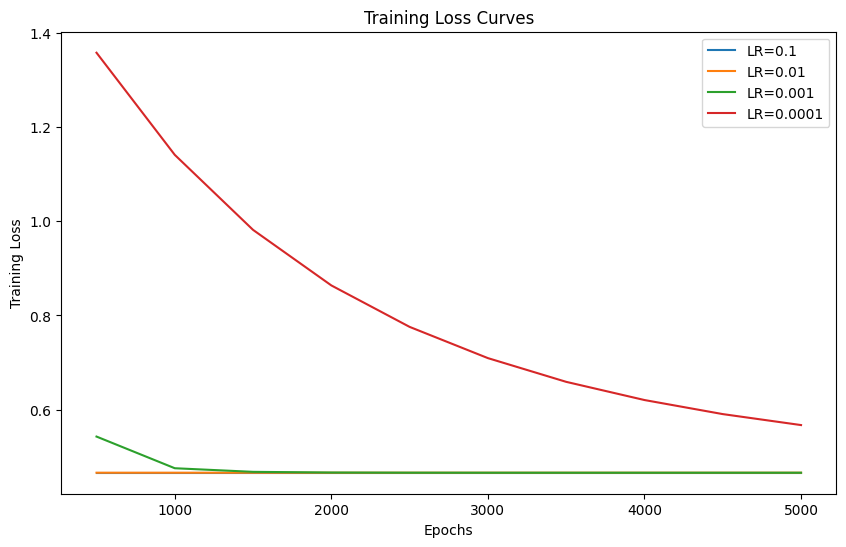


Best Learning Rate: 0.001
Best Validation Loss: 0.3361


In [116]:
#Below we just have our plotting section
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(500, 500 * (len(all_train_losses[i]) + 1), 500), all_train_losses[i], label='LR={}'.format(lr))

plt.title('Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

print('\nBest Learning Rate: {}'.format(best_lr))
print('Best Validation Loss: {:.4f}'.format(best_val_loss))

In [117]:
#Problem 3

#Data set locations
X3 = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].values
Y3 = df.iloc[:, 0].values
# Convert numpy arrays to PyTorch tensors
X3_tensor = torch.tensor(X, dtype=torch.float32)
Y3_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [118]:
from sklearn.model_selection import train_test_split
X_train3, X_val3, Y_train3, Y_val3 = train_test_split(X3_tensor, Y3_tensor, test_size=0.2, random_state=0)

In [120]:
# The code below is similar to the previous problem in a sense that it will be used to find the bestmodel
learning_rates = [0.1, 0.01, 0.001, 0.0001]

best_model = None
best_val_loss = float('inf')
best_lr = None

all_train_losses = []
all_val_losses = []

for lr in learning_rates:
    print('\L learning rate: {}'.format(lr))
    model, train_losses, val_losses = train_model(X_train3, Y_train3, X_val3, Y_val3, lr)

    # Pick the best model based on validation loss
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model = model
        best_lr = lr

    # Append the loss lists
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

\Llearning rate: 0.1
Epoch [500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [1000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [1500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [3000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [3500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [4000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [4500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [5000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
\Llearning rate: 0.01
Epoch [500/5000], Training Loss: 0.4656, Validation Loss: 0.3362
Epoch [1000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [1500/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2000/5000], Training Loss: 0.4656, Validation Loss: 0.3361
Epoch [2500/5000], Training Loss: 0

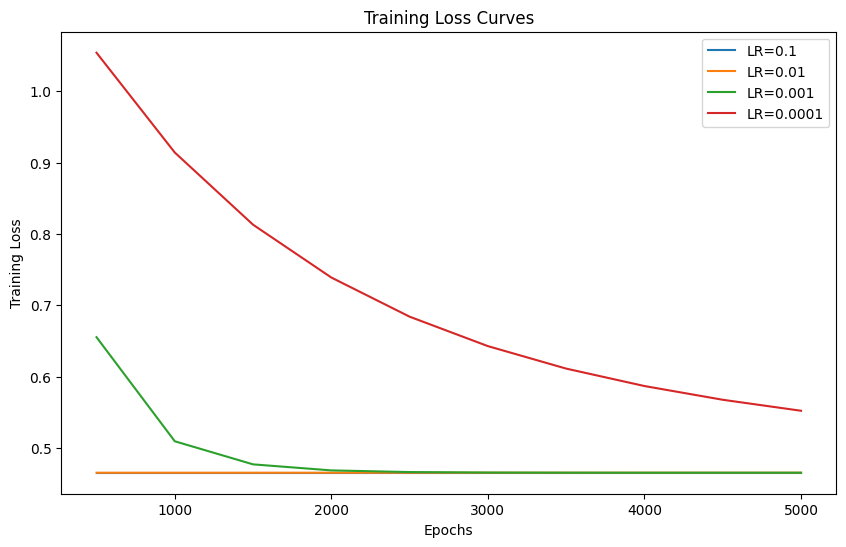


Best Learning Rate: 0.001
Best Validation Loss: 0.3361


In [121]:
#Below we just have our plotting section
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(500, 500 * (len(all_train_losses[i]) + 1), 500), all_train_losses[i], label='LR={}'.format(lr))

plt.title('Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

print('\nBest Learning Rate: {}'.format(best_lr))
print('Best Validation Loss: {:.4f}'.format(best_val_loss))